In [ ]:
!pip uninstall -y opencv-python opencv-python-headless opencv-contrib-python

!apt-get install -y cmake
!apt-get install -y libopencv-dev build-essential cmake git pkg-config libgtk-3-dev \
   libavcodec-dev libavformat-dev libswscale-dev libtbb2 libtbb-dev libjpeg-dev \
   libpng-dev libtiff-dev libdc1394-22-dev libv4l-dev v4l-utils \
   libxvidcore-dev libx264-dev libxine2-dev gstreamer1.0-tools \
   libgstreamer-plugins-base1.0-dev libgstreamer-plugins-good1.0-dev \
   libgtk2.0-dev libtiff5-dev libopenexr-dev libatlas-base-dev \
   python3-dev python3-numpy libtbb-dev libeigen3-dev \
   libfaac-dev libmp3lame-dev libtheora-dev libvorbis-dev \
   libxvidcore-dev libx264-dev yasm libopencore-amrnb-dev \
   libopencore-amrwb-dev libv4l-dev libxine2-dev libtesseract-dev \
   liblapacke-dev libopenblas-dev checkinstall

!git clone https://github.com/opencv/opencv.git
!git clone https://github.com/opencv/opencv_contrib.git

%cd opencv
!mkdir build
%cd build
!cmake -D CMAKE_BUILD_TYPE=RELEASE \
       -D CMAKE_INSTALL_PREFIX=/usr/local \
       -D OPENCV_ENABLE_NONFREE=ON \
       -D OPENCV_EXTRA_MODULES_PATH=../../opencv_contrib/modules \
       -D BUILD_EXAMPLES=ON ..
!make -j8
!make install

Streaming output truncated to the last 5000 lines.
[  7%] Building CXX object modules/core/CMakeFiles/opencv_core.dir/matmul.avx512_skx.cpp.o
[  7%] Linking CXX shared library ../../lib/libopencv_core.so
[  7%] Built target opencv_core
[  7%] Processing OpenCL kernels (imgproc)
[  7%] Building CXX object modules/hdf/CMakeFiles/opencv_hdf.dir/src/hdf5.cpp.o
[  8%] Building CXX object modules/flann/CMakeFiles/opencv_flann.dir/src/flann.cpp.o
[  8%] Building CXX object modules/flann/CMakeFiles/opencv_flann.dir/src/miniflann.cpp.o
[  8%] Building CXX object modules/signal/CMakeFiles/opencv_signal.dir/src/signal_resample.cpp.o
[  8%] Building CXX object modules/ml/CMakeFiles/opencv_ml.dir/src/ann_mlp.cpp.o
[  8%] Building CXX object apps/version/CMakeFiles/opencv_version.dir/opencv_version.cpp.o
[  8%] Building CXX object modules/ml/CMakeFiles/opencv_ml.dir/src/boost.cpp.o
[  8%] Building CXX object modules/imgproc/CMakeFiles/opencv_imgproc.dir/src/accum.cpp.o
[  8%] Linking CXX executable 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#***Task 1: Harris Corner Detection***

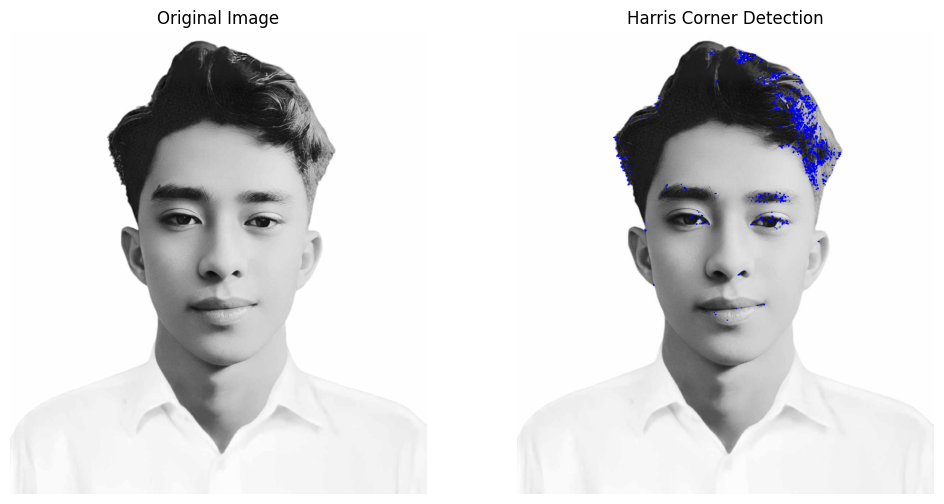

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
image_path = '/content/drive/MyDrive/IMAGES/original_image1.jpg'
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded correctly
if gray_image is None:
    print("Error loading image!")
else:
    # Convert grayscale image to float32
    gray = np.float32(gray_image)

    # Apply Harris Corner Detection
    harris_corners = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

    # Dilate corner image to enhance corner points
    harris_corners = cv2.dilate(harris_corners, None)

    # Threshold for an optimal value, marking the corners in the original image
    threshold = 0.01 * harris_corners.max()
    image_with_corners = cv2.cvtColor(gray_image, cv2.COLOR_GRAY2BGR)  # Convert to BGR to display colored corners
    image_with_corners[harris_corners > threshold] = [0, 0, 255]  # Mark corners in red

    # Display the original and corner-detected images using matplotlib
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(gray_image, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Harris Corner Detection')
    plt.imshow(image_with_corners)
    plt.axis('off')

    plt.show()


#***Task 2: HOG Feature Extraction***

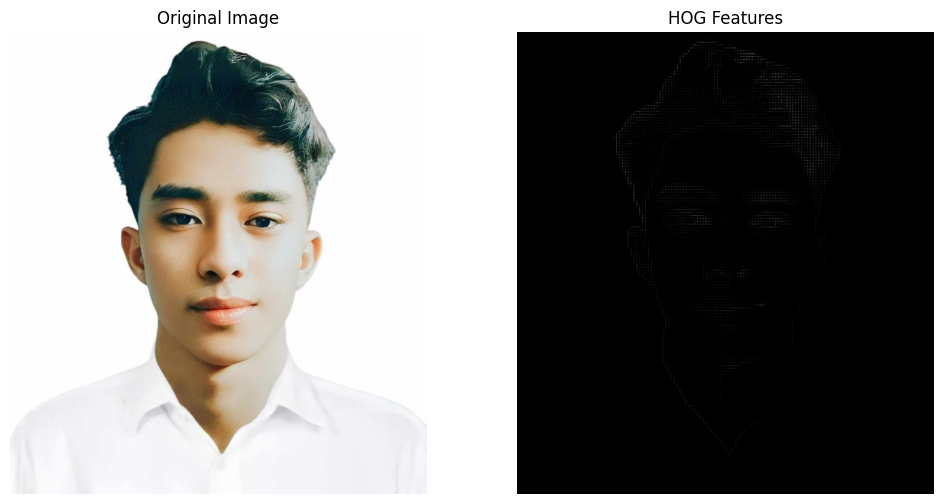

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure

# Load the image
image_path = '/content/drive/MyDrive/IMAGES/original_image1.jpg'  # Replace with your image path
image = cv2.imread(image_path)

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Extract HOG features and the HOG image
hog_features, hog_image = hog(
        gray_image,
        orientations=9,
        pixels_per_cell=(8, 8),
        cells_per_block=(2, 2),
        block_norm='L2-Hys',
        visualize=True,
        transform_sqrt=True
    )

# Rescale the HOG image to enhance visualization
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Display the original image and HOG visualization
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('HOG Features')
plt.imshow(hog_image_rescaled, cmap='gray')
plt.axis('off')

plt.show()


#***Task 3: ORB Feature Extraction and Matching***

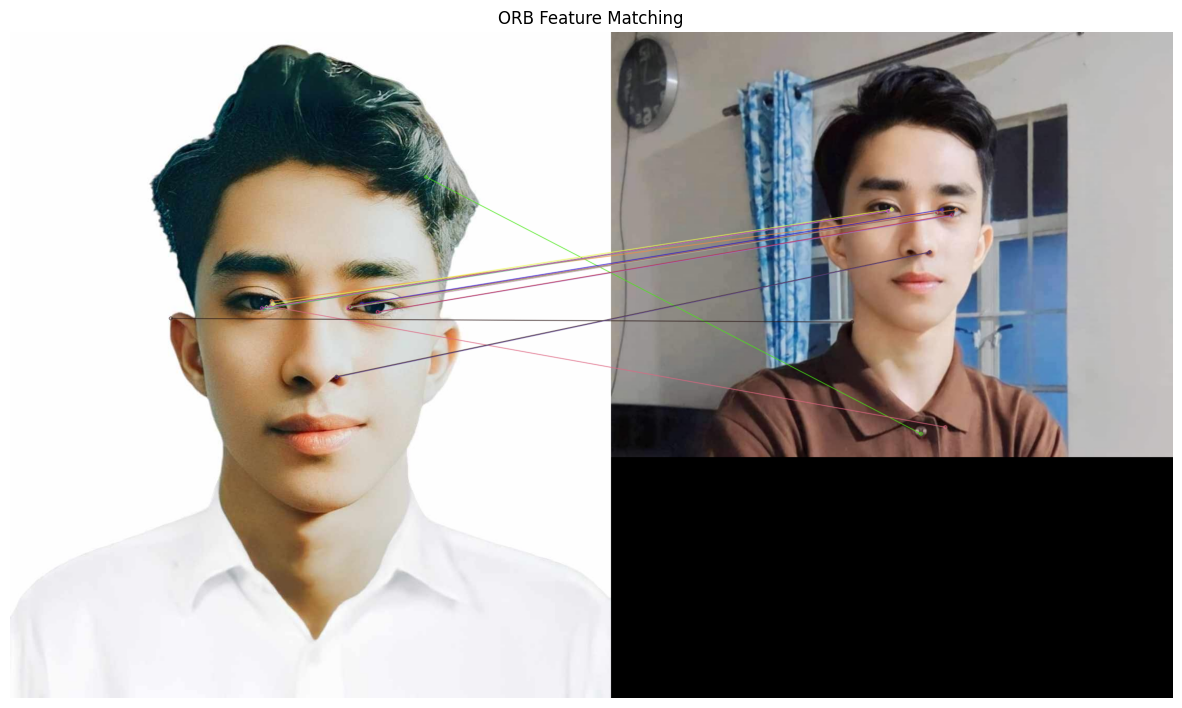

In [11]:
import cv2
import matplotlib.pyplot as plt

# Load the images
image_path1 = '/content/drive/MyDrive/IMAGES/original_image1.jpg'  # Replace with your first image path
image_path2 = '/content/drive/MyDrive/IMAGES/original_image2.jpg'  # Replace with your second image path

image1 = cv2.imread(image_path1)
image2 = cv2.imread(image_path2)

# Convert the images to grayscale
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Initialize the ORB detector
orb = cv2.ORB_create()

# Detect keypoints and compute descriptors for both images
keypoints1, descriptors1 = orb.detectAndCompute(gray1, None)
keypoints2, descriptors2 = orb.detectAndCompute(gray2, None)

# Use FLANN-based matcher for matching descriptors
index_params = dict(algorithm=6,  # FLANN_INDEX_LSH
                    table_number=6,  # 12
                    key_size=12,     # 20
                    multi_probe_level=1)  # 2
search_params = dict(checks=50)  # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params, search_params)

# Match descriptors
matches = flann.knnMatch(descriptors1, descriptors2, k=2)

# Store all the good matches as per Lowe's ratio test
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)

# Draw matches
matched_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matched keypoints
plt.figure(figsize=(15, 10))
plt.title('ORB Feature Matching')
plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
plt.axis('off')
plt.show()


#***Task 4: SIFT and SURF Feature Extraction***

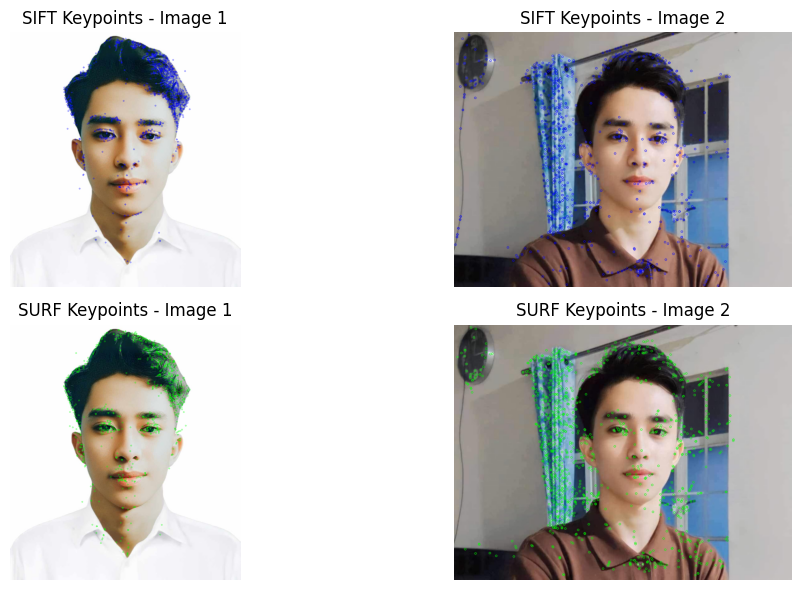

In [12]:
import cv2
import matplotlib.pyplot as plt

# Load the images
image_path1 = '/content/drive/MyDrive/IMAGES/original_image1.jpg'
image_path2 = '/content/drive/MyDrive/IMAGES/original_image2.jpg'
image1 = cv2.imread(image_path1)
image2 = cv2.imread(image_path2)

# Convert the images to grayscale
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors using SIFT
keypoints1_sift, descriptors1_sift = sift.detectAndCompute(gray1, None)
keypoints2_sift, descriptors2_sift = sift.detectAndCompute(gray2, None)

# Initialize SURF detector
surf = cv2.xfeatures2d.SURF_create(hessianThreshold=400)

# Detect keypoints and compute descriptors using SURF
keypoints1_surf, descriptors1_surf = surf.detectAndCompute(gray1, None)
keypoints2_surf, descriptors2_surf = surf.detectAndCompute(gray2, None)

# Draw keypoints on the images
image1_sift = cv2.drawKeypoints(image1, keypoints1_sift, None, color=(255, 0, 0))
image2_sift = cv2.drawKeypoints(image2, keypoints2_sift, None, color=(255, 0, 0))
image1_surf = cv2.drawKeypoints(image1, keypoints1_surf, None, color=(0, 255, 0))
image2_surf = cv2.drawKeypoints(image2, keypoints2_surf, None, color=(0, 255, 0))

# Display the keypoints detected by SIFT
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.title('SIFT Keypoints - Image 1')
plt.imshow(cv2.cvtColor(image1_sift, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('SIFT Keypoints - Image 2')
plt.imshow(cv2.cvtColor(image2_sift, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
plt.axis('off')

# Display the keypoints detected by SURF
plt.subplot(2, 2, 3)
plt.title('SURF Keypoints - Image 1')
plt.imshow(cv2.cvtColor(image1_surf, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('SURF Keypoints - Image 2')
plt.imshow(cv2.cvtColor(image2_surf, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
plt.axis('off')

plt.tight_layout()
plt.show()


#***Task 5: Feature Matching using Brute-Force Matcher***

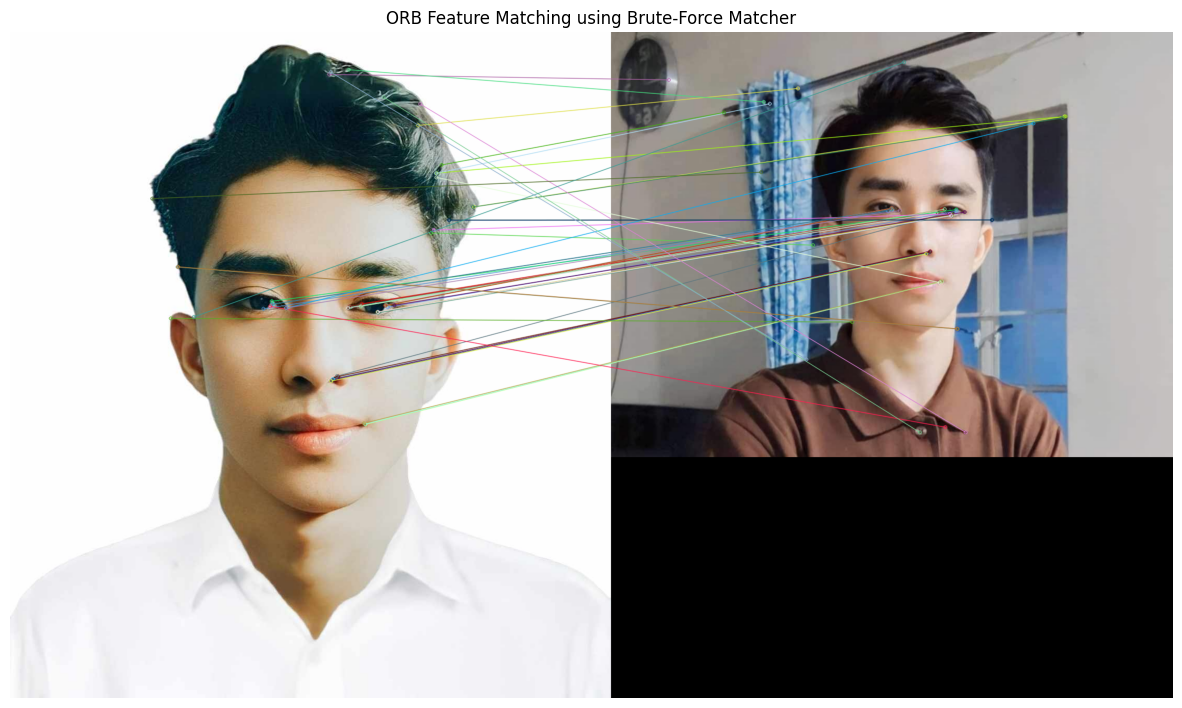

In [13]:
import cv2
import matplotlib.pyplot as plt

# Load the images
image_path1 = '/content/drive/MyDrive/IMAGES/original_image1.jpg'
image_path2 = '/content/drive/MyDrive/IMAGES/original_image2.jpg'

image1 = cv2.imread(image_path1)
image2 = cv2.imread(image_path2)

# Convert the images to grayscale
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Initialize the ORB detector
orb = cv2.ORB_create()

# Detect keypoints and compute descriptors for both images
keypoints1, descriptors1 = orb.detectAndCompute(gray1, None)
keypoints2, descriptors2 = orb.detectAndCompute(gray2, None)

# Initialize the Brute-Force Matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors
matches = bf.match(descriptors1, descriptors2)

# Sort matches by distance (the lower the distance, the better the match)
matches = sorted(matches, key = lambda x:x.distance)

# Draw the first 50 matches
matched_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display the matched keypoints
plt.figure(figsize=(15, 10))
plt.title('ORB Feature Matching using Brute-Force Matcher')
plt.imshow(cv2.cvtColor(matched_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
plt.axis('off')
plt.show()


#***Task 6: Image Segmentation using Watershed Algorithm***

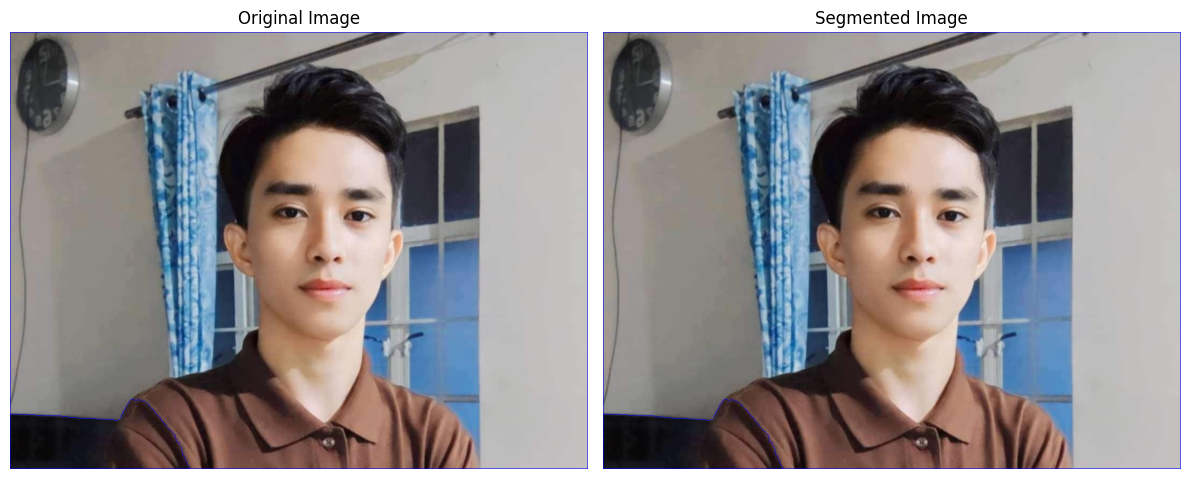

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/drive/MyDrive/IMAGES/original_image2.jpg'  # Replace with your image path
image = cv2.imread(image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply a binary threshold to the grayscale image
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Remove noise using morphological operations
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

# Sure background area
sure_bg = cv2.dilate(opening, kernel, iterations=3)

# Finding sure foreground area using distance transform
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0 but 1
markers = markers + 1

# Now, mark the region of unknown with zero
markers[unknown == 255] = 0

# Apply the Watershed algorithm
markers = cv2.watershed(image, markers)
image[markers == -1] = [255, 0, 0]  # Mark the boundaries with red color

# Display the original image and the segmented image
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Segmented Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
plt.axis('off')

plt.tight_layout()
plt.show()
